In [29]:
%load_ext autoreload
%autoreload 2

from data_processing.data_loader import *
from data_processing.trade_features import *
from data_processing.ob_features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from datetime import datetime, timedelta
folder = "data"
contract = "CAKEUSDT"
start_date = datetime(2025, 4, 2)
end_date = datetime(2025, 4, 2)


trades_feature = TradeFeature(1, inc_vwap=True, inc_vwap_change=True, inc_vol=True, inc_vol_change=True, inc_taker=True, inc_taker_change=True)
volatility_feature = VolatilityFeature(10)
ob_feature = LevelOBFeature(num_levels=10, change=False, include_prices=True)
#trend_feature = TrendFeature(1)

input_feature_creator = FeatureCreator([
    trades_feature, 
    volatility_feature,
    ob_feature,
    trend_feature
    ])
output_feature_creator = FeatureCreator([])

a, b = load_ob_and_trade_data_new(folder, contract, start_date, end_date, timedelta(seconds=60), input_feature_creator, output_feature_creator)

2025-04-02


0 - 8


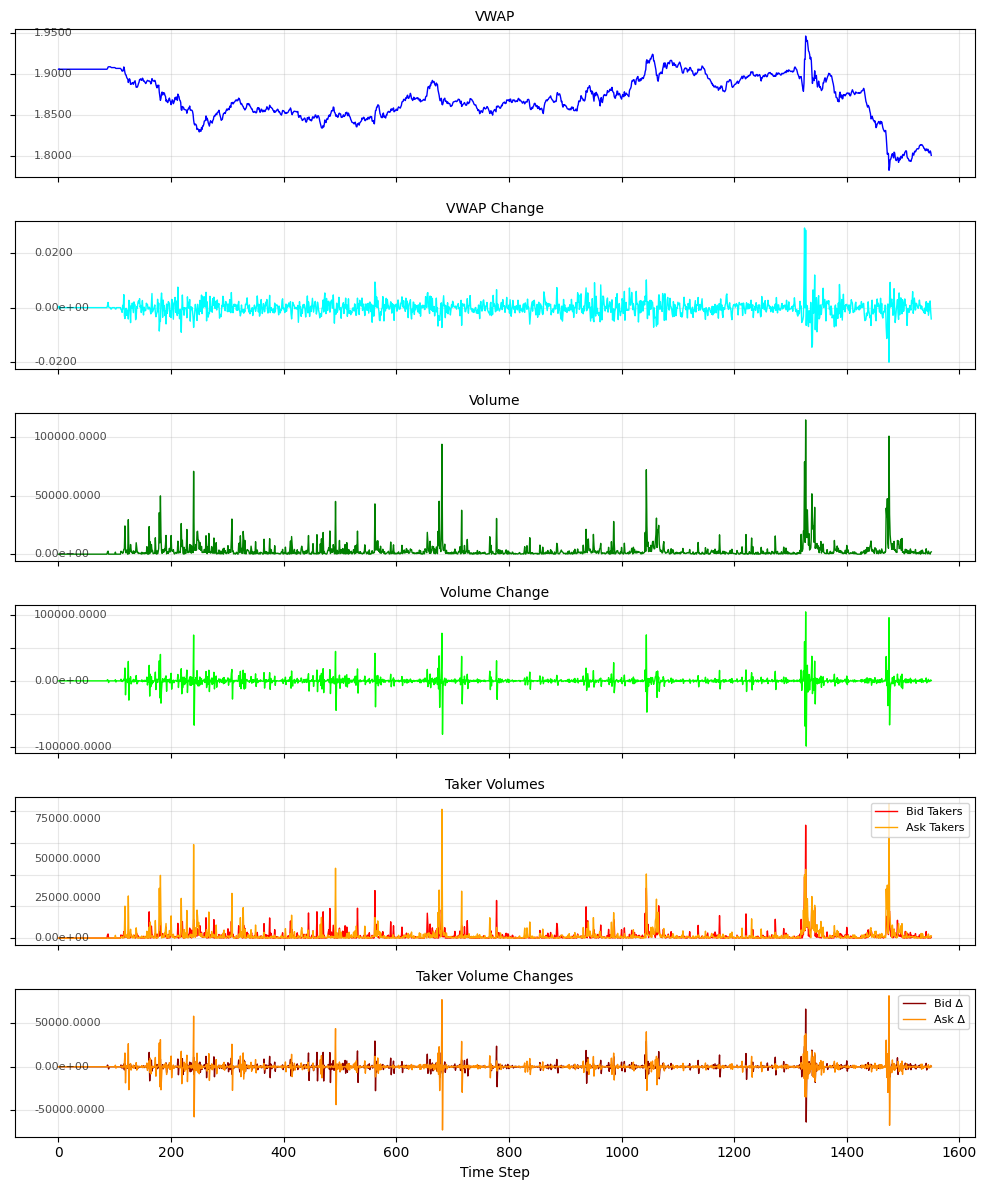

8 - 9


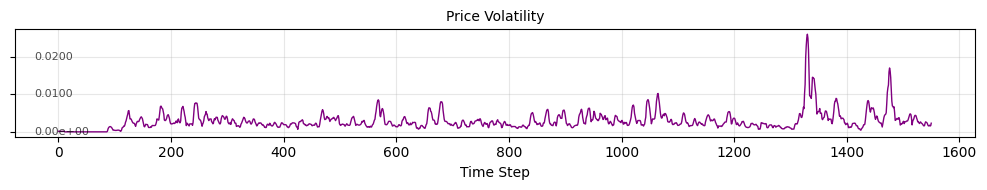

9 - 49


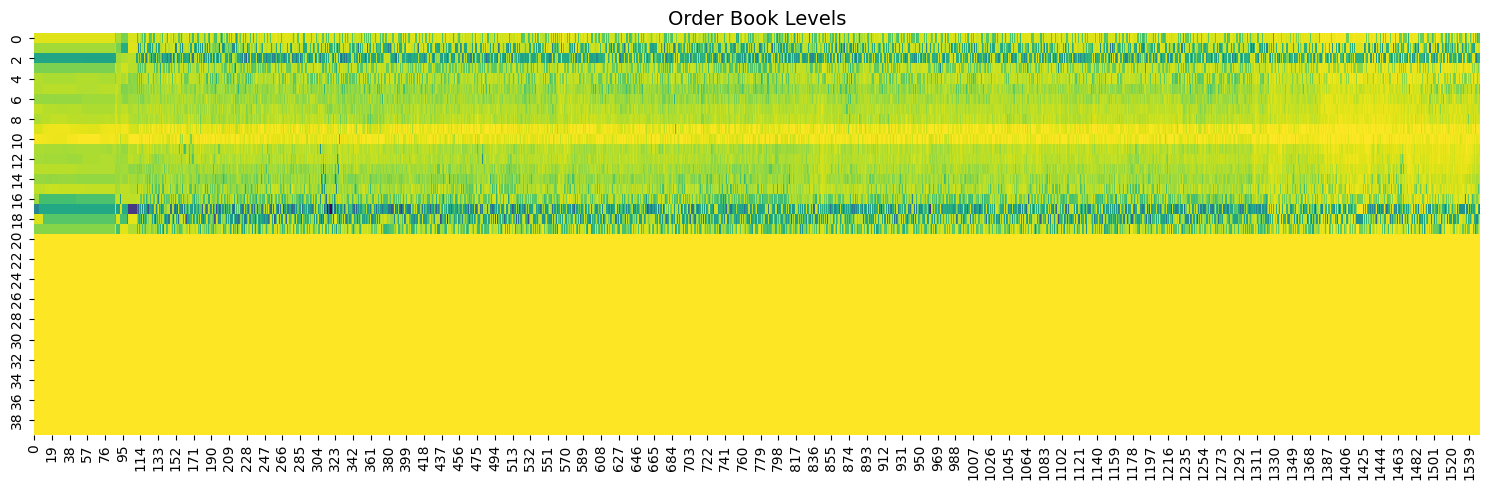

49 - 52


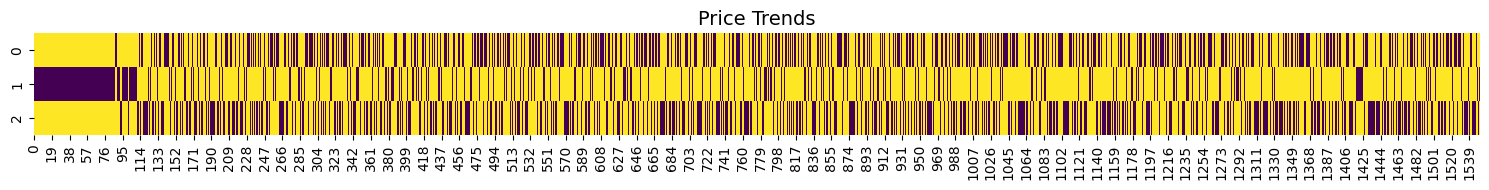

In [53]:
input_feature_creator.visualize(a, 0)
input_feature_creator.visualize(a, 1)
input_feature_creator.visualize(a, 2)
input_feature_creator.visualize(a, 3)